In [1]:
print(__doc__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz
#from pydotplus import graphviz as gr
#from PIL import Image
#from IPython.display import display
from sklearn.metrics import accuracy_score
import pickle

Automatically created module for IPython interactive environment


In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/mamintoosi/DM/master/dataset/playgolf.csv')
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
#dataframe to 0,1
outlook_encoder = LabelEncoder()
df['Outlook'] = outlook_encoder.fit_transform(df['Outlook'])

temp_encoder = LabelEncoder()
df['Temp'] = temp_encoder.fit_transform(df['Temp'])

hum_encoder = LabelEncoder()
df['Humidity'] = hum_encoder.fit_transform(df['Humidity'])

windy_encoder = LabelEncoder()
df['Windy'] = windy_encoder.fit_transform(df['Windy'])

play_encoder = LabelEncoder()
df['Play Golf'] = play_encoder.fit_transform(df['Play Golf'])

X = df.iloc[:,0:4] 
Y = df.iloc[:,4]

#split test & train
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 20)
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(x_train,y_train)

#Model predict
y_pred1 = model.predict(x_train)
train_acc = accuracy_score(y_train,y_pred1)*100
print('Accuracy on train data = {}'.format(train_acc))

Accuracy on train data = 100.0


In [4]:
#save Model
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [5]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [6]:
#load Model
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [7]:
#today : Sunny,Cool,Normal,False

Xtoday = [[2,0,1,0]]
ytoday = model.predict(Xtoday)
print("X=%s, play Golf=%s" % (Xtoday[0], ytoday[0]))

X=[2, 0, 1, 0], play Golf=1


In [8]:
#tomarrow : Sunny,Mild,Normal,False
Xtomarrow = [[2,2,1,0]]
ytomarrow = model.predict(Xtomarrow )
print("X=%s, play Golf=%s" % (Xtomarrow[0], ytomarrow [0]))

X=[2, 2, 1, 0], play Golf=1


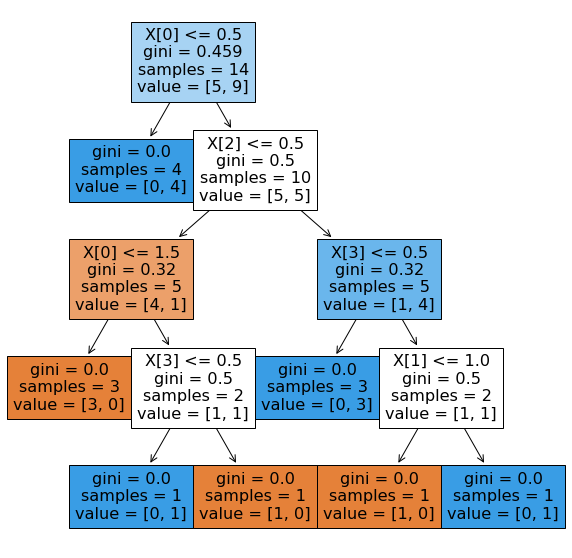

In [9]:
#show tree with plot
#pip install graphviz
#اگر کتابخانه ای نصب نبود باید graphviz  نصب شود
#البته تاجایی که برنامه را اجرا کردم در فضای کلب مشکب نصب کتابخانه ای نبود
'''label = 'Play Golf'
features = X
features
export_graphviz(model, out_file = 'dtree.dot', feature_names = features, class_names = label, rounded = True, precision = 4, filled = True)
graph = gr.graph_from_dot_file('dtree.dot')
graph.write_png('tree.png')
im = Image.open('tree.png')
display(im)'''

from sklearn.tree import DecisionTreeClassifier, plot_tree
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize=(10,10))
clf = DecisionTreeClassifier().fit(X,Y)
plot_tree(clf, filled=True)
plt.show()